In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# df = pd.read_csv("../results/rssi_n10_10d_adr.csv")
# df = pd.read_csv("../results/rssi_n10_10d_noadr.csv")
df = pd.read_csv("../results/rssi_berlin_gw100m.csv")
df

,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:06:52-44960)",Unnamed: 1,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:06:52-44960).1",Unnamed: 3,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:06:52-44960).2",Unnamed: 5,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:06:52-44960).3",Unnamed: 7,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:06:52-44960).4",Unnamed: 9,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:06:52-44960).5",Unnamed: 11,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:06:52-44960).6",Unnamed: 13,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:06:52-44960).7",Unnamed: 15,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:06:52-44960).8",Unnamed: 17,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230502-15:06:52-44960).9",Unnamed: 19
0,552.770621,-65.477178,788.923274,-62.703836,797.596637,-67.942564,900.282520,-63.736285,924.945266,-68.889823,978.728558,-69.339909,1257.652892,-59.443700,1861.326344,-72.006408,1880.686186,-66.774356,1953.267470,-76.662677
1,553.970621,-65.477178,790.123274,-62.703836,798.796637,-67.942564,901.482520,-63.736285,926.145266,-68.889823,979.928558,-69.339909,1258.852892,-59.443700,1862.526344,-72.006408,1881.886186,-66.774356,1954.467470,-76.662677
2,1592.129922,-68.443149,1542.797385,-59.558923,2586.284301,-70.039127,2418.018497,-59.945916,1461.710986,-80.805589,1941.309497,-62.216147,1833.385299,-60.754331,2575.109937,-70.968740,2327.305648,-69.901843,2279.807886,-65.695773
3,2568.993996,-68.434984,2600.623799,-76.986394,3230.389011,-74.863111,3436.677227,-70.752285,2850.753673,-68.224502,2774.153015,-61.202696,2919.654680,-60.944258,3462.971348,-82.654067,3543.814302,-66.015455,2787.008007,-77.927884
4,4025.812555,-77.256851,4708.071404,-74.011730,7011.329969,-68.686601,3624.196178,-60.184573,4690.486458,-73.590370,6246.688495,-66.209017,4921.641175,-71.165982,4993.802574,-70.738262,4680.410797,-62.451717,3088.573923,-62.471350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809137.095966,-62.076700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,811535.206878,-66.963335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,811755.949993,-74.143000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812210.176270,-63.010873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# rssi_berlin_gw100m.csv
locations = [[822.0194698360865, 739.4046194171533, 23], [263.9939801048604, 299.80550314765424, 23], [468.6109037408023, 606.6390164084733, 23], [677.377121595724, 311.6158274188638, 5.1], [734.4841017249855, 487.4600875368342, 23], [714.6851075206068, 205.09913122281432, 19], [403.5160410553799, 136.8531596083194, 23], [220.07116886903532, 212.38414978329092, 23], [108.28748674801318, 581.6178667871282, 19], [511.31633024220355, 295.69291112665087, 23]]
distances = [490.9845858372635, 239.1658724664293, 197.06693373599455, 269.9714723370692, 299.17153956786615, 352.6494853812043, 303.1263591036511, 324.5792879614826, 385.8966341254787, 162.56495453832926]
initial_node_order = ['node0', 'node1', 'node2', 'node3', 'node4', 'node5', 'node6', 'node7', 'node8', 'node9']
conditions = pd.DataFrame(distances, index=initial_node_order)
conditions

,0
node0,490.984586
node1,239.165872
node2,197.066934
node3,269.971472
node4,299.171540
node5,352.649485
node6,303.126359
node7,324.579288
node8,385.896634
node9,162.564955


In [73]:
df_count = pd.read_csv("../results/count_berlin_gw100m.csv")
df_count

,run,repetition,module,name,value
0,General-0-20230502-15:06:52-44960,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 0,543
1,General-0-20230502-15:06:52-44960,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 1,564
2,General-0-20230502-15:06:52-44960,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 2,581
3,General-0-20230502-15:06:52-44960,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 3,604
4,General-0-20230502-15:06:52-44960,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 4,621
5,General-0-20230502-15:06:52-44960,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 5,641
6,General-0-20230502-15:06:52-44960,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 6,663
7,General-0-20230502-15:06:52-44960,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 7,678
8,General-0-20230502-15:06:52-44960,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 8,700
9,General-0-20230502-15:06:52-44960,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 9,726


In [74]:
node_order = []
for i in ["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]:
    node_num = df_count.loc[df_count["value"] == df[i].count()-1].index[0]
    node_order.append("node"+str(node_num))
print(node_order)

['node8', 'node6', 'node0', 'node1', 'node4', 'node9', 'node2', 'node3', 'node7', 'node5']


In [75]:
rssi_values = df[["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]]
rssi_values.set_axis(node_order, axis='columns', inplace=True)
print(rssi_values.head())

       node8      node6      node0      node1      node4      node9  \
0 -65.477178 -62.703836 -67.942564 -63.736285 -68.889823 -69.339909   
1 -65.477178 -62.703836 -67.942564 -63.736285 -68.889823 -69.339909   
2 -68.443149 -59.558923 -70.039127 -59.945916 -80.805589 -62.216147   
3 -68.434984 -76.986394 -74.863111 -70.752285 -68.224502 -61.202696   
4 -77.256851 -74.011730 -68.686601 -60.184573 -73.590370 -66.209017   

       node2      node3      node7      node5  
0 -59.443700 -72.006408 -66.774356 -76.662677  
1 -59.443700 -72.006408 -66.774356 -76.662677  
2 -60.754331 -70.968740 -69.901843 -65.695773  
3 -60.944258 -82.654067 -66.015455 -77.927884  
4 -71.165982 -70.738262 -62.451717 -62.471350  


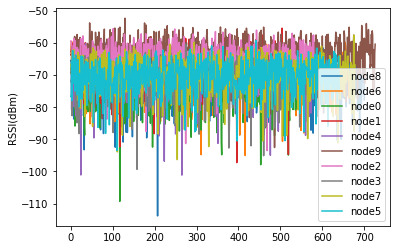

In [76]:
# rssi_values.plot.line()
plt.figure(facecolor="white")
plt.plot(rssi_values)
plt.legend(rssi_values)
plt.ylabel("RSSI(dBm)")
plt.show()

<AxesSubplot:ylabel='Frequency'>

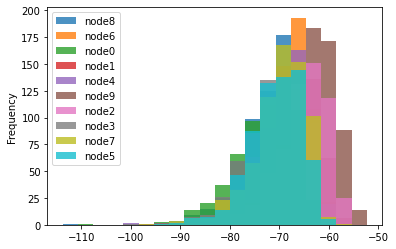

In [77]:
rssi_values.plot.hist(bins=20, alpha=0.8)

<AxesSubplot:>

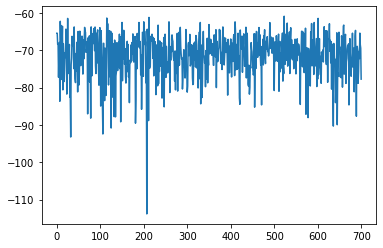

In [78]:
rssi_values["node8"].plot.line()

<AxesSubplot:ylabel='Frequency'>

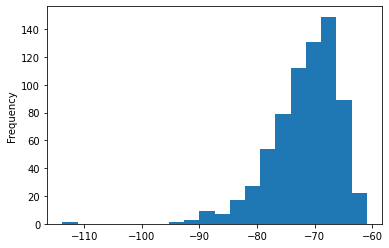

In [79]:
rssi_values["node8"].plot.hist(bins=20)

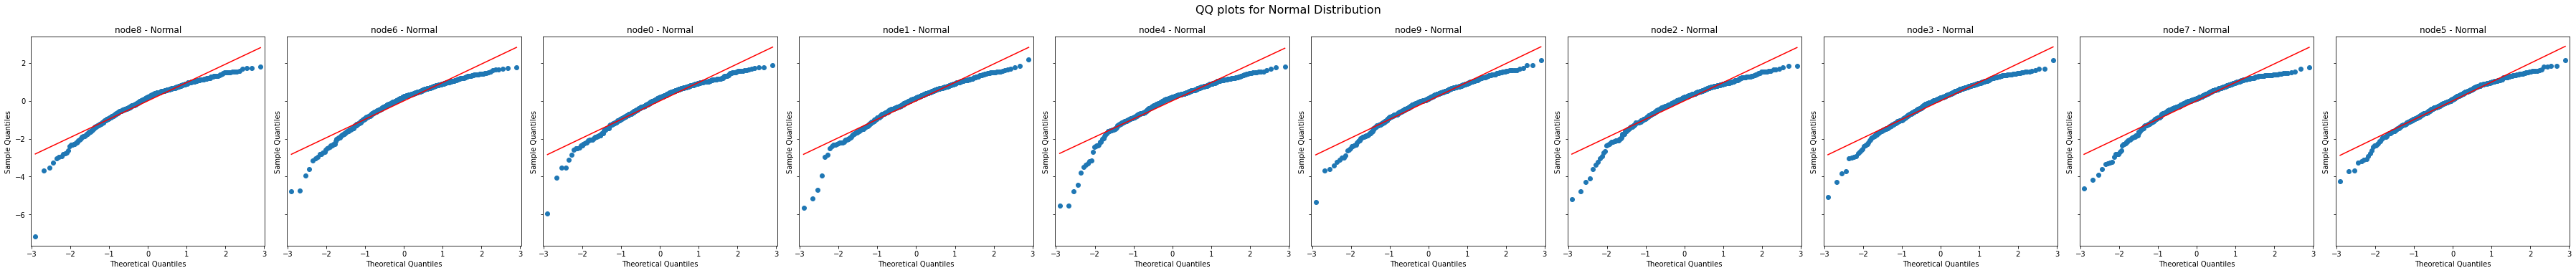

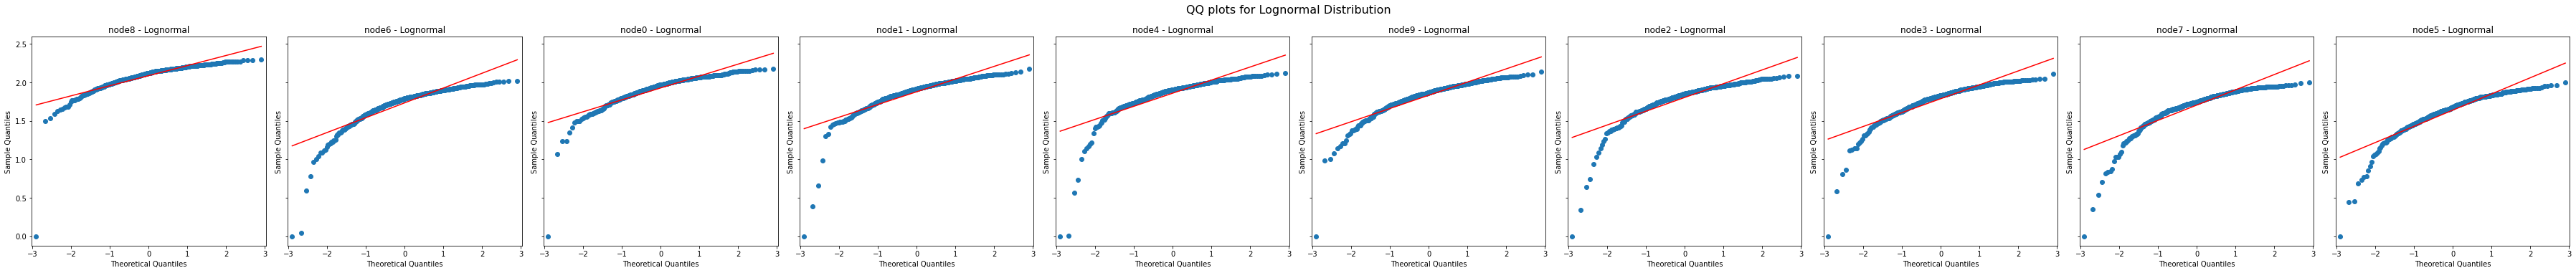

In [80]:
def plot_qq_statsmodels_horizontal(data, distribution_type):
    fig, ax = plt.subplots(1, len(data.columns), figsize=(5 * len(data.columns), 5), sharey=True)
    for idx, column in enumerate(data.columns):
        if distribution_type == "normal":
            sm.qqplot(data[column], line="r", ax=ax[idx])
        elif distribution_type == "lognormal":
            sm.qqplot(np.log(data[column] - data[column].min() + 1), line="r", ax=ax[idx])
        ax[idx].set_title(f"{column} - {distribution_type.capitalize()}")

    plt.tight_layout()
    plt.suptitle(f"QQ plots for {distribution_type.capitalize()} Distribution", fontsize=16, y=1.05)
    plt.show()


cleaned_rssi_values = rssi_values.dropna()
scaler = StandardScaler()
normalized_rssi_values = pd.DataFrame(scaler.fit_transform(cleaned_rssi_values), columns=cleaned_rssi_values.columns)


plot_qq_statsmodels_horizontal(normalized_rssi_values, "normal")
plot_qq_statsmodels_horizontal(normalized_rssi_values, "lognormal")


- norm dist because there is no multipath  
- the reason left end is above the line is that we cannot detect signal below -130dBm  

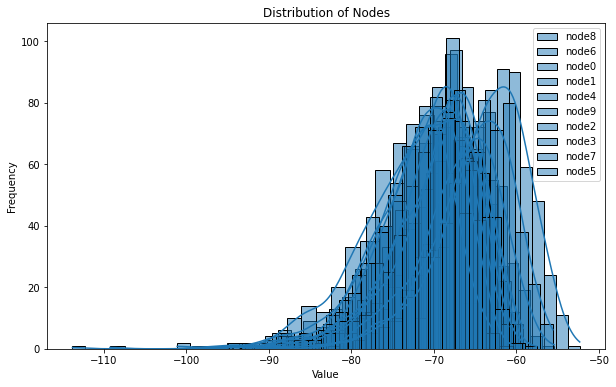

In [81]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create histograms or KDE plots for each node
for column in rssi_values.columns:
    sns.histplot(rssi_values[column], kde=True, ax=ax, label=column)

# Customize the plot
ax.set_title("Distribution of Nodes")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.legend()

# Display the plot
plt.show()

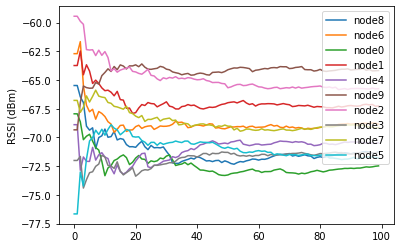

In [82]:
# Calculate the cumulative sum for each column
cumulative_sum = rssi_values.cumsum()

# Calculate the cumulative count for each column
cumulative_count = rssi_values.apply(lambda x: (x.notna().cumsum()))

# Compute the average value for each element by dividing cumulative sum by cumulative count
average_df = cumulative_sum / cumulative_count

# Display the new DataFrame with the average values
plt.figure(facecolor="white")
plt.plot(average_df[:100])
plt.legend(average_df,loc='upper right')
plt.ylabel("RSSI (dBm)")
plt.show()
# average_df.plot.line()

         distance       rssi
node0  490.984586 -73.946305
node1  239.165872 -67.045244
node2  197.066934 -65.511338
node3  269.971472 -71.991024
node4  299.171540 -69.380464
node5  352.649485 -70.690538
node6  303.126359 -69.093531
node7  324.579288 -69.981429
node8  385.896634 -71.634036
node9  162.564955 -63.814257


<AxesSubplot:xlabel='distance', ylabel='rssi'>

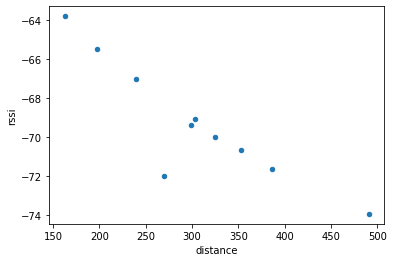

In [83]:
mean_rssi = pd.DataFrame(rssi_values.mean())
rssi_distance = pd.merge(conditions, mean_rssi, left_index=True, right_index=True)
rssi_distance.columns = ["distance", "rssi"]
print(rssi_distance)
rssi_distance.plot.scatter(x="distance",y="rssi")

{'node0': 490.9845858372635, 'node1': 239.1658724664293, 'node2': 197.06693373599455, 'node3': 269.9714723370692, 'node4': 299.17153956786615, 'node5': 352.6494853812043, 'node6': 303.1263591036511, 'node7': 324.5792879614826, 'node8': 385.8966341254787, 'node9': 162.56495453832926}
node8
node6
node0
node1
node4
node9
node2
node3
node7
node5


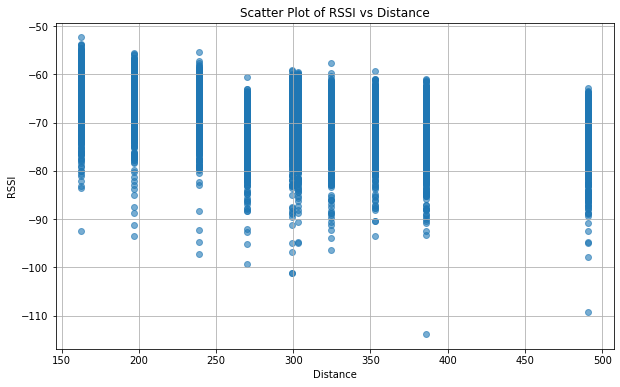

In [84]:
# Create a mapping from node names to their corresponding distance
node_to_distance = conditions.squeeze().to_dict()
print(node_to_distance)

# Create an empty array to store x (distance) and y (rssi) values for the scatter plot
x_values = []
y_values = []

# Iterate through the columns (nodes) in rssi_values
for node in rssi_values.columns:
    # Get the distance for the current node
    print(node)
    distance = node_to_distance[node]
    
    # Get the rssi values for the current node
    rssi_values_node = rssi_values[node].dropna()
    
    # Append the distance value to x_values as many times as there are rssi values
    x_values.extend([distance] * len(rssi_values_node))
    
    # Append the rssi values to y_values
    y_values.extend(rssi_values_node)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.6)

# Add labels and title
plt.xlabel("Distance")
plt.ylabel("RSSI")
plt.title("Scatter Plot of RSSI vs Distance")

# Optionally, you can add a grid for better readability
plt.grid(True)

# Finally, display the plot
plt.show()



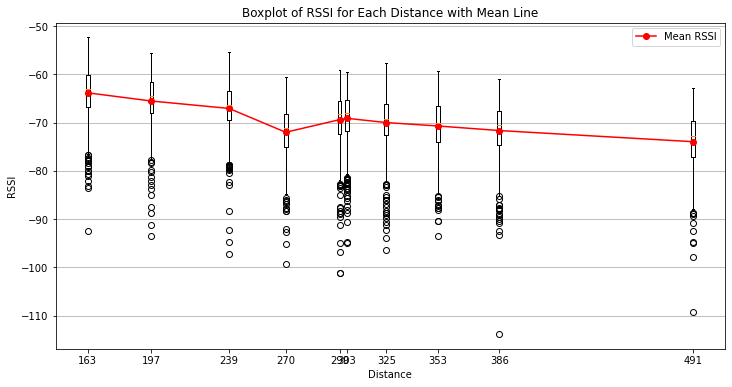

In [85]:
# Create a list of node names
node_names = rssi_values.columns

# Create a mapping from node names to their corresponding distance
node_to_distance = conditions.squeeze().to_dict()

# Create a list of distances corresponding to the node names
distances_list = [node_to_distance[node] for node in node_names]

# Initialize an empty list to store the data for box plots
box_plot_data = []

# Add the RSSI values for each node to the box_plot_data list
for node in node_names:
    box_plot_data.append(rssi_values[node].dropna().tolist())

# Create custom ticks and labels for the x-axis
xticks = distances_list
xticklabels = [int(round(dist)) for dist in xticks]

# Calculate the mean RSSI for each node
mean_rssi_values = [np.mean(rssi) for rssi in box_plot_data]

# Sort the data by distances
sorted_data = sorted(zip(distances_list, box_plot_data, mean_rssi_values))
sorted_distances, sorted_box_plot_data, sorted_mean_rssi_values = zip(*sorted_data)

# Create a box plot for each node with distance on the x-axis
plt.figure(figsize=(12, 6), facecolor="white")
plt.boxplot(sorted_box_plot_data, positions=sorted_distances, widths=2)

# Set custom ticks and labels for the x-axis
sorted_xticks = sorted(xticks)
sorted_xticklabels = [str(int(round(d))) for d in sorted_xticks]
plt.xticks(sorted_xticks, sorted_xticklabels)

# Add labels and title
plt.xlabel("Distance")
plt.ylabel("RSSI")
plt.title("Boxplot of RSSI for Each Distance with Mean Line")

# Optionally, you can add a grid for better readability
plt.grid(axis='y')

# Plot a line connecting the mean RSSI values for each node
plt.plot(sorted_distances, sorted_mean_rssi_values, marker='o', linestyle='-', color='red', label='Mean RSSI')

# Add a legend to the plot
plt.legend()

# Finally, display the plot
plt.show()




In [88]:
print([i for i in rssi_distance["rssi"]])

[-73.94630524200359, -67.04524365136507, -65.51133843649966, -71.99102431036357, -69.38046352414914, -70.69053819851595, -69.09353142802274, -69.9814290434943, -71.63403554811134, -63.81425676768592]


# prediction